In [1]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
import matplotlib
import pylatexenc
import math

In [2]:
%matplotlib inline

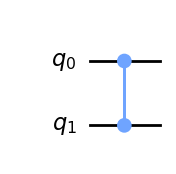

In [3]:
oracleCircuit = QuantumCircuit(2,name="Oracle")
oracleCircuit.cz(0,1)
oracleCircuit.to_gate
oracleCircuit.draw(output="mpl")

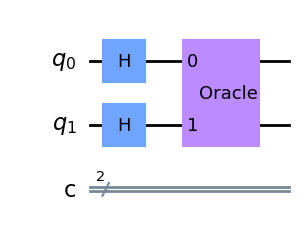

In [5]:
mainCircuit = QuantumCircuit(2,2)
mainCircuit.h([0,1])
mainCircuit.append(oracleCircuit,[0,1])
mainCircuit.draw(output='mpl')

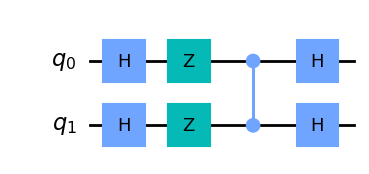

In [6]:
reflectionCircuit = QuantumCircuit(2,name="Reflection")
reflectionCircuit.h([0,1])
reflectionCircuit.z([0,1])
reflectionCircuit.cz(0,1)
reflectionCircuit.h([0,1])
reflectionCircuit.to_gate()
reflectionCircuit.draw(output="mpl")

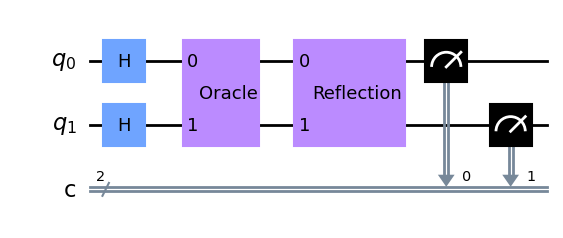

In [7]:
mainCircuit.append(reflectionCircuit,[0,1])
mainCircuit.measure([0,1],[0,1])
mainCircuit.draw(output='mpl')

In [9]:
simulator='qasm_simulator'
simulator = Aer.get_backend(simulator)
result=execute(mainCircuit,backend=simulator,shots=1024).result()
result=result.get_counts()
result

{'11': 1024}